In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
%matplotlib inline
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl

# 손글씨 분류

In [ ]:
from sklearn.datasets import load_digits

### 데이터 불러오기

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다.

0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 

각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1,797개가 있습니다.

In [ ]:
digits = load_digits() # 1,979개의 이미지 데이터 로드
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(f'target class 종류 : {np.unique(digits.target)}')
c=len(np.unique(digits.target))

target class 종류 : [0 1 2 3 4 5 6 7 8 9]


In [ ]:
x = digits.data # 이미지. 즉, 특성 행렬, 64차원 벡터
y = digits.target # 각 이미지에 대한 레이블

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')
print(x[0],y[0])

x.shape: (1797, 64)
y.shape: (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 0


In [ ]:
from itertools import chain, repeat
import random

length= len(y)
n=1500 # 1500개를 훈련데이터로
m=length-n

np.random.seed(0)
p=list(repeat(1/length,length)) # N = #of total sample

num_list=np.arange(length)
train_index=np.random.choice(num_list,n,replace=False,p=p) # dtype=ndarray
train_index=train_index.tolist() # dtype=list

test_index=np.delete(num_list,train_index)



In [ ]:
x_train=x[train_index]
y_train=y[train_index]
x_test=x[test_index]
y_test=y[test_index]

### 모델 세우기

In [ ]:
model = nn.Sequential(
    nn.Linear(x_train.shape[1], 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16,c ) # hidden_layer3 = 16, output_layer = 10
)

In [ ]:
# Torch 전용 tensor로 바꿔주는 것
X = torch.tensor(x_train, dtype=torch.float32)
Y = torch.tensor(y_train, dtype=torch.int64)

print(f'X:{X}\nY:{Y}')
print(f'X.shape:{X.shape}\nY.shape:{Y.shape}')

X:tensor([[ 0.,  3., 15.,  ..., 16., 16.,  0.],
        [ 0.,  0.,  9.,  ...,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  5.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  5.,  0.,  0.],
        [ 0.,  0.,  1.,  ...,  0.,  0.,  0.]])
Y:tensor([2, 9, 1,  ..., 6, 1, 7])
X.shape:torch.Size([1500, 64])
Y.shape:torch.Size([1500])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
losses = []
acc=[]

### 학습

In [ ]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forward 연산, 최종 값은 liear dotproduct 값으로 실수 값이 나옴
  correct_prediction = torch.argmax(y_pred, 1) == Y

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

  accuracy = correct_prediction.float().mean()
  
  
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
    print()
  
    print('Epoch {:4d}/{} Cost: {:.6f}/Accuracy:{:.6f}'.format(
            epoch+1, 100, loss.item(), accuracy.item()
        ))
  acc.append(accuracy.item())
  losses.append(loss.item())

print(correct_prediction)


Epoch   10/100 Cost: 0.779456/Accuracy:0.835333

Epoch   20/100 Cost: 0.213803/Accuracy:0.936667

Epoch   30/100 Cost: 0.108230/Accuracy:0.974000

Epoch   40/100 Cost: 0.056081/Accuracy:0.982667

Epoch   50/100 Cost: 0.031122/Accuracy:0.996667

Epoch   60/100 Cost: 0.018487/Accuracy:0.998000

Epoch   70/100 Cost: 0.011719/Accuracy:0.998667

Epoch   80/100 Cost: 0.007835/Accuracy:0.999333

Epoch   90/100 Cost: 0.005590/Accuracy:1.000000

Epoch  100/100 Cost: 0.004181/Accuracy:1.000000
tensor([True, True, True,  ..., True, True, True])


Text(0.5, 0, 'Epoch')

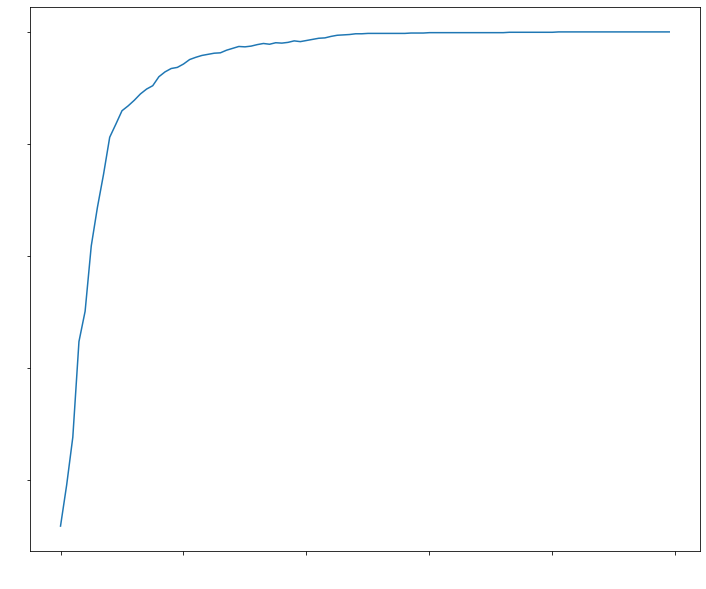

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Epoch',color='white')

Text(0.5, 0, 'Epoch')

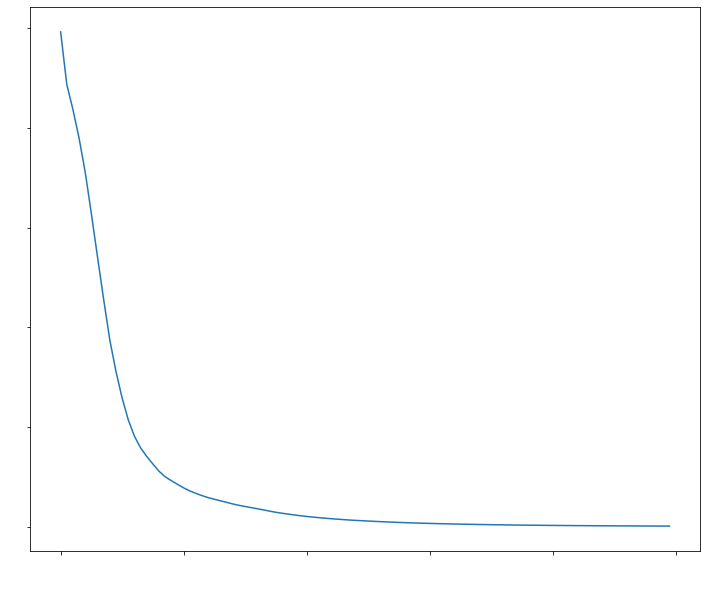

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(losses)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Epoch',color='white')

### 테스트

In [ ]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
  X_test = torch.tensor(x_test, dtype=torch.float32)
  Y_test = torch.tensor(y_test, dtype=torch.int64)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
    
    #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9629629850387573


# MNIST : 이건 좀 고민해봐야할 듯

### 데이터 불러오기

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)



다음 기기로 학습합니다: cuda


In [ ]:
# for reproducibility
random.seed(0)
torch.manual_seed(0)
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
x_train=mnist_train.data
y_train=mnist_train.targets
x_test=mnist_test.data
y_test=mnist_test.targets


print(x_train.shape)
print(x_test.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
c= y_train.unique(return_counts=True)[0]
class_num=len(c)
print(c)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### 기본 설정 : 웨이트 초기값(linear()), optimizer, epoch 수, 배치 수 등

In [ ]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)
print(data_loader)

### 모델 세우기

In [ ]:
model = nn.Sequential(
    nn.Linear(x_train.shape[1]*x_train.shape[2], 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16,class_num)) # hidden_layer3 = 16, output_layer = 10).to(device)

In [ ]:
X = torch.tensor(x_train, dtype=torch.float32)
Y = torch.tensor(y_train, dtype=torch.int64)
print(X.shape)
print(Y.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
losses = []
acc=[]

In [ ]:
x_train.size()

torch.Size([60000, 28, 28])

In [ ]:
for epoch in range(x_train.shape[0]*training_epochs):
  avg_loss = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    #배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
    X = X.view(-1, x_train.shape[1]*x_train.shape[2]).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
    Y=Y.to(device)

    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    correct_prediction = (torch.argmax(y_pred, 1) == Y)

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

    accuracy = correct_prediction.float().mean()
  
  
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    avg_loss += loss / batch_size

 

  if (epoch+1) % y_train.shape[0]  == 0:
    print('Epoch{} /  Cost: {:.6f} / Accuracy:{:.6f}'.format(
            (epoch+1)/y_train.size, loss.item(), accuracy.item()
        ))
  acc.append(accuracy.item())
  losses.append(loss.item())

RuntimeError: ignored

# CNN 구현하기

### 1. 아키텍처 직접 형성

1번 레이어 : 합성곱층(Convolutional layer)

합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

2번 레이어 : 합성곱층(Convolutional layer)

합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

3번 레이어 : 전결합층(Fully-Connected layer)

특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

random.seed(0)
torch.manual_seed(0)
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

다음 기기로 학습합니다: cuda


In [ ]:
inputs = torch.Tensor(1, 1, 28, 28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


In [ ]:
conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1,padding=1) #(채널 수, filter 개수, kernersize, stride=1(default),)
print(conv1)

conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

pool = nn.MaxPool2d(kernel_size=2,stride=2)
print(pool)



Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
out = conv1(inputs)
print(out.shape)

out = pool(out)
print(out.shape)

out = conv2(out)
print(out.shape)

out = pool(out)
print(out.shape)

out = out.view(out.size(0), -1) 
print(out.shape)

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])
torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out)
print(out.shape)

tensor([[-5.2279e+07, -7.7353e+07,  1.6137e+08, -3.1858e+08,  8.7782e+07,
         -3.3701e+07, -1.6024e+08, -1.0119e+08,  2.0457e+08,  5.0734e+07]],
       grad_fn=<AddmmBackward>)
torch.Size([1, 10])


# MNIST : CNN class 이용하기

## 1. mini VGG Net(conv1 + conv2 + conv3 + FC1 + FC2, dropout,Xavier initialization)

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import dataloader as dataloader
import numpy as np
import random
import math

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(0)
torch.manual_seed(0)
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

다음 기기로 학습합니다: cuda


### 데이터 불러오기

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(mnist_train.data.shape)
print(mnist_train.targets.shape)
print(np.unique(mnist_train.targets))
print(mnist_test.data.shape)
print(mnist_test.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
[0 1 2 3 4 5 6 7 8 9]
torch.Size([10000, 28, 28])
torch.Size([10000])


In [ ]:
c=len(np.unique(mnist_train.targets))
train_num=mnist_train.data.shape[0]
test_num=mnist_test.data.shape[0]
data_shape=mnist_train.data.shape[1:]

print(f'c={c}')
print(f'train_num={train_num}')
print(f'test_num={test_num}')
print(f'data_shape={data_shape}')

c=10
train_num=60000
test_num=10000
data_shape=torch.Size([28, 28])


### 하이퍼파라미터 설정, **Dataloader**

In [ ]:
learning_rate = 0.01
training_epochs = 15
batch_size = 300


In [ ]:
# Dataloader : 미니배치를 만들어주는 함수
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size ,shuffle=True, drop_last=True)

total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch)) #60,000/100 = 600

총 배치의 수 : 600


### 클래스로 모델 설계

In [44]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
            
        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64,64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=1))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc1=torch.nn.Sequential(
            torch.nn.Linear(5 * 5 * 64, 128, bias=True),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU())
        
        self.fc2=torch.nn.Sequential(
            torch.nn.Linear(128, 128, bias=True),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU())
        
        self.result_layer=torch.nn.Linear(128, 10, bias=True)
         
        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.result_layer.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.shape[0], -1)    # 전결합층을 위해서 Flatten
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.result_layer(out)
        return out

In [45]:
# CNN 모델 정의
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

### 학습

In [46]:
print(f'총 Epochs 수 = {training_epochs}')

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
        y_pred = model.forward(X) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y
        accuracy = correct_prediction.float().mean()

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

  

    print(f'[Epoch: {epoch+1}] / cost = {avg_cost } / accuracy = {accuracy} ')

총 Epochs 수 = 15
[Epoch: 1] / cost = 2.30452823638916 / accuracy = 0.09999999403953552 
[Epoch: 2] / cost = 2.301847457885742 / accuracy = 0.08999999612569809 
[Epoch: 3] / cost = 2.301846981048584 / accuracy = 0.09999999403953552 
[Epoch: 4] / cost = 2.3012197017669678 / accuracy = 0.11999999731779099 
[Epoch: 5] / cost = 2.301478385925293 / accuracy = 0.09999999403953552 
[Epoch: 6] / cost = 2.3011229038238525 / accuracy = 0.08999999612569809 
[Epoch: 7] / cost = 2.3007853031158447 / accuracy = 0.17000000178813934 
[Epoch: 8] / cost = 2.300435781478882 / accuracy = 0.11999999731779099 
[Epoch: 9] / cost = 2.2996318340301514 / accuracy = 0.09999999403953552 
[Epoch: 10] / cost = 2.2969789505004883 / accuracy = 0.14999999105930328 
[Epoch: 11] / cost = 2.2832086086273193 / accuracy = 0.1599999964237213 
[Epoch: 12] / cost = 2.0663793087005615 / accuracy = 0.3999999761581421 
[Epoch: 13] / cost = 0.8269917964935303 / accuracy = 0.8700000047683716 
[Epoch: 14] / cost = 0.36141130328178406

### 테스트

In [47]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9437999725341797


## 2. Conv1 + Conv2 + Conv3 + FC1 (with dropout, Xavier Initialization) + FC2(Xavier Initialization)

#### 클래스로 모델 설계

In [48]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)) #(7+2-3)/2 +1 =4

        # L4 FC 4x4x128 inputs -> 512 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 512 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(512, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [49]:
# CNN 모델 정의
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 학습

In [50]:
print(f'총 Epochs 수 = {training_epochs}')

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
        y_pred = model.forward(X) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y
        accuracy = correct_prediction.float().mean()

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

  

    print(f'[Epoch: {epoch+1}] / cost = {avg_cost } / accuracy = {accuracy} ')

총 Epochs 수 = 15
[Epoch: 1] / cost = 0.21425022184848785 / accuracy = 0.9699999690055847 
[Epoch: 2] / cost = 0.05543114244937897 / accuracy = 0.9799999594688416 
[Epoch: 3] / cost = 0.038891423493623734 / accuracy = 1.0 
[Epoch: 4] / cost = 0.031568944454193115 / accuracy = 0.9799999594688416 
[Epoch: 5] / cost = 0.02619081549346447 / accuracy = 1.0 
[Epoch: 6] / cost = 0.021135782822966576 / accuracy = 0.9899999499320984 
[Epoch: 7] / cost = 0.01987665891647339 / accuracy = 1.0 
[Epoch: 8] / cost = 0.01677420362830162 / accuracy = 1.0 
[Epoch: 9] / cost = 0.014598596841096878 / accuracy = 0.9899999499320984 
[Epoch: 10] / cost = 0.012472887523472309 / accuracy = 1.0 
[Epoch: 11] / cost = 0.013029627501964569 / accuracy = 1.0 
[Epoch: 12] / cost = 0.010928202420473099 / accuracy = 1.0 
[Epoch: 13] / cost = 0.008981240913271904 / accuracy = 0.9899999499320984 
[Epoch: 14] / cost = 0.009345599450170994 / accuracy = 1.0 
[Epoch: 15] / cost = 0.00909716822206974 / accuracy = 1.0 


### 테스트

In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8912000060081482


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## 3. Conv1 + Conv2 + Conv3 + FC1 (with dropout, HE Initialization) + FC2(HE Initialization)

#### 클래스로 모델 설계

In [51]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)) #(7+2-3)/2 +1 =4

        # L4 FC 4x4x128 inputs -> 512 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 512, bias=True)
        math.sqrt(2/train_num)*torch.nn.init.normal_(self.fc1.weight)
        
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 512 inputs -> 10 outputs
        
        self.fc2 = torch.nn.Linear(512, 10, bias=True)
        math.sqrt(2/train_num)*torch.nn.init.normal_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [52]:
# CNN 모델 정의
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 학습

In [53]:
print(f'총 Epochs 수 = {training_epochs}')

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
        y_pred = model.forward(X) # forward 연산
        correct_prediction = torch.argmax(y_pred, 1) == Y
        accuracy = correct_prediction.float().mean()

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

  

    print(f'[Epoch: {epoch+1}] / cost = {avg_cost } / accuracy = {accuracy} ')

총 Epochs 수 = 15
[Epoch: 1] / cost = 1.9092472791671753 / accuracy = 0.8799999952316284 
[Epoch: 2] / cost = 0.21984036266803741 / accuracy = 0.9699999690055847 
[Epoch: 3] / cost = 0.15392282605171204 / accuracy = 0.9899999499320984 
[Epoch: 4] / cost = 0.12236183136701584 / accuracy = 0.9699999690055847 
[Epoch: 5] / cost = 0.10229554772377014 / accuracy = 0.9699999690055847 
[Epoch: 6] / cost = 0.09466201066970825 / accuracy = 0.9699999690055847 
[Epoch: 7] / cost = 0.08113031089305878 / accuracy = 0.9899999499320984 
[Epoch: 8] / cost = 0.07502222806215286 / accuracy = 0.9699999690055847 
[Epoch: 9] / cost = 0.06939632445573807 / accuracy = 0.9699999690055847 
[Epoch: 10] / cost = 0.06410930305719376 / accuracy = 0.9799999594688416 
[Epoch: 11] / cost = 0.05787273496389389 / accuracy = 0.9899999499320984 
[Epoch: 12] / cost = 0.05666518211364746 / accuracy = 0.9899999499320984 
[Epoch: 13] / cost = 0.049942564219236374 / accuracy = 1.0 
[Epoch: 14] / cost = 0.04676612839102745 / acc

### 테스트

In [55]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.6866999864578247
